# Australian Open Predicition

## Data Loading

In [58]:
# Import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
# Get current working directory
src =  os.getcwd()
# Load data for male players
maleDF = pd.read_csv(src+'\\data\\ATP_matches.csv')
# Load data for female players
femaleDF = pd.read_csv(src+'\\data\\WTA_matches.csv')

# Display tensor sizes
print("Male data: \n" + str(maleDF.shape[0]) + " Observations of " + str(maleDF.shape[1]) + " Variables\n")
print("Female Data: \n" + str(femaleDF.shape[0]) + " Observations of " + str(femaleDF.shape[1]) + " Variables")

Male data: 
20807 Observations of 35 Variables

Female Data: 
13906 Observations of 35 Variables


D:\Miniconda\envs\Tennis\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (11,12,13,14,17,18,24,25,26,27,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [60]:
# Show top of male dataframe
maleDF.head()

,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won
0,Edouard Roger-Vasselin,Eric Prodon,Chennai,2-Jan-12,Hard,First Round,106,97,0,2,...,3,21,33,13,26,1,3,15,49,49
1,Dudi Sela,Fabio Fognini,Chennai,2-Jan-12,Hard,First Round,83,48,0,2,...,4,17,32,5,26,0,1,8,33,30
2,Go Soeda,Frederico Gil,Chennai,2-Jan-12,Hard,First Round,120,102,0,2,...,2,45,70,18,35,2,4,36,103,99
3,Yuki Bhambri,Karol Beck,Chennai,2-Jan-12,Hard,First Round,345,101,0,2,...,1,15,33,13,29,2,3,15,46,43
4,Yuichi Sugita,Olivier Rochus,Chennai,2-Jan-12,Hard,First Round,235,67,0,2,...,0,19,32,13,22,1,7,30,78,62


In [61]:
# Show top of female dataframe
femaleDF.head()

,Winner,Loser,Tournament,Tournament_Date,Court_Surface,Round_Description,Winner_Rank,Loser_Rank,Retirement_Ind,Winner_Sets_Won,...,Loser_DoubleFaults,Loser_FirstServes_Won,Loser_FirstServes_In,Loser_SecondServes_Won,Loser_SecondServes_In,Loser_BreakPoints_Won,Loser_BreakPoints,Loser_ReturnPoints_Won,Loser_ReturnPoints_Faced,Loser_TotalPoints_Won
0,Johanna Larsson,Lourdes Dominguez-Lino,Auckland,1-Jan-14,Hard,First Round,84,69,0.0,2,...,4,16,32,13,33,2,8,24,62,53
1,Ana Konjuh,Roberta Vinci,Auckland,1-Jan-14,Hard,First Round,259,14,0.0,2,...,1,34,65,10,23,5,6,30,68,74
2,Ayumi Morita,Lucie Safarova,Auckland,1-Jan-14,Hard,First Round,60,29,0.0,2,...,3,21,32,12,32,3,5,26,68,59
3,Venus Williams,Andrea Hlavackova,Auckland,1-Jan-14,Hard,First Round,47,134,0.0,2,...,4,23,34,12,28,2,6,30,82,65
4,Julia Goerges,Karin Knapp,Auckland,1-Jan-14,Hard,First Round,72,41,0.0,2,...,4,52,70,30,58,2,2,28,102,110


In [62]:
maleData = maleDF.head(24) 

# Columns that we wish to extract for winners of a match
winnerColumns = [  'Winner', 'Tournament_Date','Tournament','Court_Surface', 'Winner_Sets_Won', \
                   'Winner_Games_Won', 'Winner_Aces', 'Winner_DoubleFaults', 'Winner_FirstServes_Won', 'Winner_FirstServes_In',\
                  'Winner_SecondServes_Won', 'Winner_SecondServes_In','Winner_BreakPoints_Won', 'Winner_BreakPoints', \
                  'Winner_ReturnPoints_Won', 'Winner_ReturnPoints_Faced', 'Winner_TotalPoints_Won']

# Columns that we wish to extract for losers of a match
loserColumns = [  'Loser', 'Tournament_Date','Tournament', 'Court_Surface', 'Loser_Sets_Won', \
                   'Loser_Games_Won', 'Loser_Aces', 'Loser_DoubleFaults', 'Loser_FirstServes_Won', 'Loser_FirstServes_In',\
                  'Loser_SecondServes_Won', 'Loser_SecondServes_In','Loser_BreakPoints_Won', 'Loser_BreakPoints', \
                  'Loser_ReturnPoints_Won', 'Loser_ReturnPoints_Faced', 'Loser_TotalPoints_Won']

finalColumns = ['Player', 'Tournament_Date', 'Tournament','Court_Surface', 'Total_Sets_Won', 'Total_Games_Won', 'Total_Aces', 'Total_DoubleFaults', 'Total_FirstServes_Won',\
        'Total_FirstServes_In', 'Total_SecondServes_Won', 'Total_SecondServes_In', 'Total_BreakPoints_Won',\
        'Total_BreakPoints', 'Total_ReturnPoints_Won', 'Total_ReturnPoints_Faced', 'Total_Points_Won']

statCols = ['Total_Sets_Won', 'Total_Games_Won', 'Total_Aces', 'Total_DoubleFaults', 'Total_FirstServes_Won',\
        'Total_FirstServes_In', 'Total_SecondServes_Won', 'Total_SecondServes_In', 'Total_BreakPoints_Won',\
        'Total_BreakPoints', 'Total_ReturnPoints_Won', 'Total_ReturnPoints_Faced', 'Total_Points_Won']

# Take a splice of male data containing winner data
maleWinnersDF = maleData.loc[:, winnerColumns ]

# Take a splice of male data containing loser data
maleLosersDF = maleData.loc[:, loserColumns]

maleWinnersDF.columns = finalColumns
maleLosersDF.columns = finalColumns
maleTournDF = pd.concat([maleWinnersDF, maleLosersDF])

maleTournSummaryDF = maleTournDF.groupby(['Player', 'Tournament', 'Tournament_Date', 'Court_Surface'])

maleTournSummaryDF = maleTournSummaryDF[statCols].agg({x:'sum' for x in statCols})

print(maleTournSummaryDF)

                                                                Total_Sets_Won  \
Player                 Tournament Tournament_Date Court_Surface                  
Andreas Beck           Chennai    2-Jan-12        Hard                      21   
Benoit Paire           Chennai    2-Jan-12        Hard                      21   
David Goffin           Chennai    2-Jan-12        Hard                     221   
Dudi Sela              Chennai    2-Jan-12        Hard                     220   
Edouard Roger-Vasselin Chennai    2-Jan-12        Hard                      21   
Eric Prodon            Chennai    2-Jan-12        Hard                       0   
Fabio Fognini          Chennai    2-Jan-12        Hard                       0   
Frederico Gil          Chennai    2-Jan-12        Hard                       1   
Go Soeda               Chennai    2-Jan-12        Hard                    2220   
Ivan Dodig             Chennai    2-Jan-12        Hard                      20   
Janko Tipsarevic

Yuki Bhambri           Chennai    2-Jan-12        Hard                         94  


## Data Cleaning

In [7]:
# Function to replace "." with NaN in a dataframe
def replaceMissingWithNaN(dataFrame):
    for column in list(dataFrame.columns.values):
        if (dataFrame[column].dtype.name == 'object'):
            # Different encodings for none in the database
            dataFrame[column] = dataFrame[column].replace({".":np.nan})

In [8]:
# Function to replace "." and NaN with 0 in a slice
def replaceMissingWithZero(sliceDF):
    # Different encodings for none in the database
    sliceDF = sliceDF.replace({np.nan:0})
    return sliceDF

In [9]:
# Encodes the variables fed into the functions as catagorical, boolean and numeric
# preseving missing data if specified, changin to zeros otherwise
def changeDataTypes(dataFrame, catagorical, boolean, numeric):
    for variable in list(maleDF.columns.values):
        if variable in catagorical:
            dataFrame[variable] = dataFrame[variable].astype('category')
        elif variable in boolean:
            dataFrame[variable] = dataFrame[variable].astype('bool')
        elif variable in numeric:
            # Keep as a float as can't save variables as ints and keep NaNs
            dataFrame[variable] = dataFrame[variable].astype('float64')
        else:
            # Replaces missing with zeros and then saves as integers
            dataFrame[variable] = replaceMissingWithZero(dataFrame[variable])
            dataFrame[variable] = dataFrame[variable].astype('int64')

In [11]:
# Convert missing entries to Nan
replaceMissingWithNaN(maleDF)
replaceMissingWithNaN(femaleDF)

In [13]:
# Check the datatypes of variables loaded
# List of Catagorical data
catagories = {'Winner', 'Loser', 'Tournament', 'Tournament_Date',
              'Court_Surface', 'Round_Description'}
# Boolean
boolean = {'Retirement_Ind'}

# Numeric that should keep missing values
numeric = {'Winner_Rank', 'Loser_Rank'}

changeDataTypes(maleDF, catagories, boolean, numeric)
changeDataTypes(femaleDF, catagories, boolean, numeric)

print(maleDF.dtypes)
print(femaleDF.dtypes)

Winner                       category
Loser                        category
Tournament                   category
Tournament_Date              category
Court_Surface                category
Round_Description            category
Winner_Rank                   float64
Loser_Rank                    float64
Retirement_Ind                   bool
Winner_Sets_Won                 int64
Winner_Games_Won                int64
Winner_Aces                     int64
Winner_DoubleFaults             int64
Winner_FirstServes_Won          int64
Winner_FirstServes_In           int64
Winner_SecondServes_Won         int64
Winner_SecondServes_In          int64
Winner_BreakPoints_Won          int64
Winner_BreakPoints              int64
Winner_ReturnPoints_Won         int64
Winner_ReturnPoints_Faced       int64
Winner_TotalPoints_Won          int64
Loser_Sets_Won                  int64
Loser_Games_Won                 int64
Loser_Aces                      int64
Loser_DoubleFaults              int64
Loser_FirstS

In [16]:
# Check catagorical variables for unique values
# Print headers for columns
print('{:-^43}'.format('-'))
print('{:<28s}{:^15s}'.format('Variable', 'Unique Values'))
print('{:-^43}'.format('-'))

# Display the variable and number of unique values
for variable in list(maleDF.columns.values):
    if (maleDF[variable].dtype.name == 'category'):
        print('{:<28s}{:>12d}'.format(variable + ":", maleDF[variable].unique().size))

-------------------------------------------
Variable                     Unique Values 
-------------------------------------------
Winner:                              548
Loser:                               767
Tournament:                           86
Tournament_Date:                     255
Court_Surface:                         4
Round_Description:                     9


## Intial Visualisation

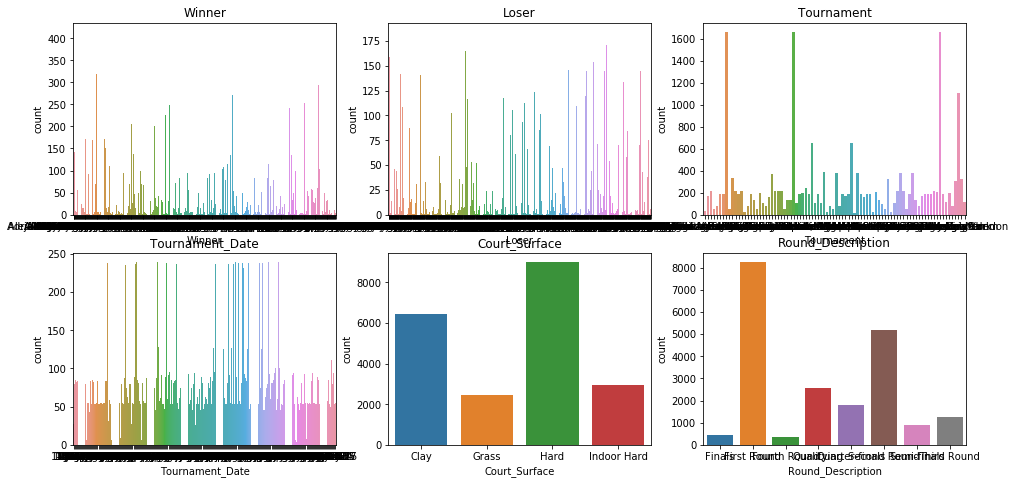

In [44]:
# Frequency of observations for different catagorical variables
# Long run time!
f = plt.figure(figsize=(16, 12))

for counter, variable in enumerate(list(maleDF.columns.values)):
    if maleDF[variable].dtype.name == 'category':
        f.add_subplot(3, 3, counter+1)
        plt.title(variable)
        sns.countplot(maleDF[variable])
# Save the plot
plt.savefig(src+'\\img\\AllCatagoricalBarCharts')  

In [45]:
# Histograms for numeric data